In [18]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [19]:
load_dotenv()

True

In [20]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [21]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ["SPY", "JPM", "GLD", "XLV"]

# Set timeframe to 1Day

timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start_date = pd.Timestamp("2018-08-07", tz="America/New_York").isoformat()

end_date = pd.Timestamp("2022-08-07", tz="America/New_York").isoformat()

In [22]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

df_portfolio = alpaca.get_bars(
    tickers, 
    timeframe, 
    start= start_date, 
    end= end_date).df 

# Reorganize the DataFrame
# Separate ticker data

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)
JPM = df_portfolio[df_portfolio['symbol']=='JPM'].drop('symbol',axis=1)
GLD = df_portfolio[df_portfolio['symbol']=='GLD'].drop('symbol',axis=1)
XLV = df_portfolio[df_portfolio['symbol']=='XLV'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames

df_portfolio = pd.concat([SPY,JPM, GLD, XLV], axis=1,keys=["SPY","JPM", "GLD", "XLV"])

# Review the first 5 rows of the Alpaca DataFrame

df_portfolio.head()

SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2018-08-07 04:00:00+00:00  285.40  286.010  285.240  285.58  43427090   
2018-08-08 04:00:00+00:00  285.39  285.910  284.940  285.46  42273966   
2018-08-09 04:00:00+00:00  285.54  285.970  284.915  285.07  37130583   
2018-08-10 04:00:00+00:00  283.42  284.055  282.360  283.16  77399449   
2018-08-13 04:00:00+00:00  283.49  284.160  281.770  282.10  65970064   

                                                      JPM                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2018-08-07 04:00:00+00:00      181015  285.635439  117.56  118.2900  117.3300   
2018-08-08 04:00:00+00:00      154349  285.479104  117.33  118.2686  117.2800   
2018-08-09 04:00:00+00:00      140980  285.455348  117.39  117.7200  116.6950   
2018-08-10 04:00:00+00:00      292690  283.350560  115.56  115.9500  114.6839   
2018-08-13 04:00:00+00:00      270772  282.691061  115.70  115.8780  113.8150   

                           ...      GLD                            XLV  \
                           ...   volume trade_count        vwap   open   
timestamp                  ...                                           
2018-08-07 04:00:00+00:00  ...  5188447       23016  114.656190  89.98   
2018-08-08 04:00:00+00:00  ...  3809872       20168  114.712053  89.99   
2018-08-09 04:00:00+00:00  ...  4252984       17425  114.890046  90.13   
2018-08-10 04:00:00+00:00  ...  6757857       33263  114.928766  89.69   
2018-08-13 04:00:00+00:00  ...  9150873       45898  113.232586  89.73   

                                                                       \
                             high     low  close   volume trade_count   
timestamp                                                               
2018-08-07 04:00:00+00:00  90.280  89.860  89.98  5170584       32903   
2018-08-08 04:00:00+00:00  90.250  89.790  90.12  5020356       29726   
2018-08-09 04:00:00+00:00  90.380  89.925  90.02  5680807       30140   
2018-08-10 04:00:00+00:00  90.160  89.320  89.63  5389545       36011   
2018-08-13 04:00:00+00:00  90.085  89.425  89.66  6563902       40624   

                                      
                                vwap  
timestamp                             
2018-08-07 04:00:00+00:00  90.027201  
2018-08-08 04:00:00+00:00  90.071769  
2018-08-09 04:00:00+00:00  90.100198  
2018-08-10 04:00:00+00:00  89.723646  
2018-08-13 04:00:00+00:00  89.744688  

[5 rows x 28 columns]

In [23]:
# Configure the Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split equally between SPY, JPM, GLV & XLV.
# Run 500 samples.

MC_ten_year = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.25,.25,.25,.25],
    num_simulation = 500,
    num_trading_days= 252 * 10)

# Review the simulation input data

MC_ten_year

In [24]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sterlingdavis/Desktop/testing123/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002475,1.008982,0.999172,0.999712,1.003894,1.010987,1.000521,1.003566,1.011260,0.990029,...,1.001682,0.999162,0.989691,1.002741,0.981763,1.002139,0.996643,0.997305,1.002561,0.999452
2,1.003881,1.005926,1.003003,1.005108,0.996845,1.015442,0.991446,1.002195,1.006727,0.983645,...,0.992160,1.003647,0.993672,1.014932,0.985717,0.994514,0.987226,0.993263,1.003783,1.010973
3,1.003786,1.002028,1.000656,1.005761,0.984968,1.015868,0.990561,0.993615,1.008490,0.970977,...,0.990508,1.010025,0.994063,1.029224,0.983714,0.994275,0.978425,0.992426,0.997652,1.013069
4,1.005452,1.009691,0.998671,1.000420,0.977014,1.016722,0.984386,0.992075,1.018826,0.975490,...,1.004347,1.009376,0.995011,1.021369,0.977984,1.005689,0.992856,0.984410,0.988150,1.020188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.914472,2.242073,1.454519,1.508721,2.692211,2.196404,3.668891,3.392527,1.926783,2.286451,...,1.728894,1.790746,1.803903,1.730655,1.897251,2.392879,2.625662,3.654802,3.111439,1.824706
2517,2.916962,2.257086,1.463802,1.498878,2.715490,2.193954,3.724340,3.395208,1.915219,2.256029,...,1.726713,1.796956,1.803032,1.726752,1.890639,2.403842,2.636310,3.639752,3.102870,1.838392
2518,2.938796,2.244641,1.450972,1.486806,2.721867,2.179677,3.748764,3.392757,1.914463,2.244652,...,1.753008,1.798340,1.798913,1.736114,1.859930,2.391544,2.598710,3.648990,3.114332,1.841127
2519,2.915616,2.212321,1.447560,1.498838,2.740425,2.164818,3.763945,3.413223,1.917653,2.252078,...,1.751907,1.801759,1.767248,1.735870,1.873050,2.398053,2.598541,3.645515,3.150951,1.847429


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

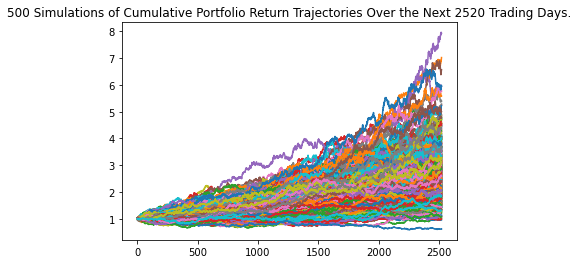

In [25]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

MC_sim_line_plot = MC_ten_year.plot_simulation()

MC_sim_line_plot

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

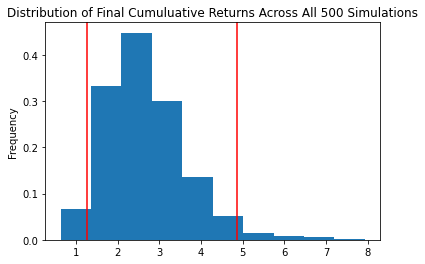

In [26]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

MC_hist_plot = MC_ten_year.plot_distribution()

MC_hist_plot